In [1]:
import numpy as np
import pandas as pd
import random
import torch
from d2l import torch as d2l


In [2]:
dev = d2l.try_gpu()

In [3]:
def synthetic_data(w, b, num_examples): 
    '''生成 y=Xw+b+噪声'''
    X = torch.normal(0, 1, (num_examples, len(w)), device=dev)
    y = torch.matmul(X, w)+ b
    y += torch.normal(0, 0.01, y.shape, device=dev)
    return X, y.reshape((-1, 1))  

In [4]:
true_w = torch.tensor([2, -3.4], device=dev)
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [5]:
# print('features:', features[0], '\nlabel:', labels[0])


In [6]:
# from torch.utils.data import Dataset
# class MyDataset(Dataset):


#     def __init__(self, txt_path):
#         fh = open(txt_path, 'r')
#         labels = []
#         features = []
#         for line in fh:
#             line = line.rstrip()
#             datas= line.split(',')
#             features.append([int(datas[0]),int(datas[1])])
#             labels.append(int(datas[2]))
#             self.features = torch.Tensor(features)
#             self.labels = torch.Tensor(labels)

#     def __len__(self):
#         return len(self.labels)


In [7]:
# data = MyDataset('data/ex1data2.txt')

# features, labels = data.features.to(dev), data.labels.to(dev)

In [8]:
# # 归一化
# import torch.nn.functional as F

# features = F.normalize(features, p=2, dim=0)
# labels = F.normalize(labels, p=2, dim=0)

In [9]:
# print(data.datas)

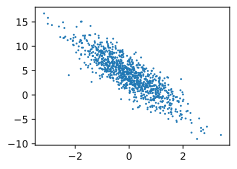

In [5]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().to('cpu').numpy(), labels.detach().to('cpu').numpy(), 1) 

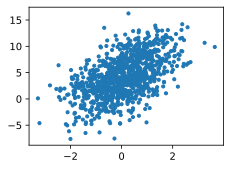

In [11]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 0].detach().to('cpu').numpy(), labels.detach().to('cpu').numpy(), 10)

In [12]:
# def data_iter(batch_size, features, labels): 
#     num_examples = len(features)
    
#     indices = list(range(num_examples))
#     random.shuffle(indices)  
#     for i in range(0, num_examples, batch_size):  
#         batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)], device=dev)
#         yield features[batch_indices], labels[batch_indices]

In [13]:
from torch.utils import data

def load_array(data_arrays, batch_size, is_train=True):
    """Construct a Pytorch data iterator"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [14]:
batch_size = 10
data_iter = load_array((features, labels), batch_size)

next(iter(data_iter))


[tensor([[ 0.0305, -1.7264],
         [ 2.2327,  0.3332],
         [-1.0466,  0.0432],
         [-0.1154, -0.6119],
         [ 1.4426,  0.3748],
         [-2.8050, -1.1723],
         [-0.5954, -2.0767],
         [-0.6760,  0.8452],
         [-1.0212, -0.0172],
         [ 0.0527,  0.0746]], device='mps:0'),
 tensor([[10.1423],
         [ 7.5398],
         [ 1.9461],
         [ 6.0480],
         [ 5.8082],
         [ 2.5682],
         [10.0597],
         [-0.0295],
         [ 2.2086],
         [ 4.0624]], device='mps:0')]

In [15]:
# for X, y in data_iter(batch_size, features, labels): 
#     print(X, '\n', y)  

In [16]:
# w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True, device=dev) 
# b = torch.zeros(1, requires_grad=True, device=dev) 

In [17]:
def linreg(X, w, b):
    """线性回归模型。"""
    return torch.matmul(X, w) + b

In [18]:
def squared_loss(y_hat, y):       
	    """均方损失。"""
	    return (y_hat - y.reshape(y_hat.shape))**2 / 2 

In [19]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降。"""
    with torch.no_grad():  
        for param in params:  
            param -= lr * param.grad / batch_size 
            print(f'参数为: {param}')
            param.grad.zero_()  
            print(f'清零后的梯度: {param.grad}')

In [20]:
from torch import nn


lr = 0.015  # 首先指定一些超参数：学习率为0.03
num_epochs = 3  # epoch为3表示把整个数据扫3遍
# net = linreg  # network为linreg前面定义的线性回归模型
net = nn.Sequential(nn.Linear(2,1,device=dev))
# loss = squared_loss  # loss为均方损失
loss = nn.MSELoss()

In [21]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)


tensor([0.], device='mps:0')

In [22]:
trainer = torch.optim.SGD(net.parameters(), lr)

for epoch in range(num_epochs):  
    print(f'第: {epoch}轮')
    i = 1
    for X, y in data_iter: 
        print(f'第{i}次')
        i += 1
        
        l = loss(net(X), y)
        trainer.zero_grad()
        
        print(l)
        l.backward()      
        trainer.step()
    
    with torch.no_grad():
        
        l = loss(net(features), labels)
        print(f'epoch {epoch + 1}, loss {l:f}')


第: 0轮
第1次
tensor(25.7058, device='mps:0', grad_fn=<MseLossBackward0>)
第2次
tensor(39.5512, device='mps:0', grad_fn=<MseLossBackward0>)
第3次
tensor(25.3404, device='mps:0', grad_fn=<MseLossBackward0>)
第4次
tensor(23.7864, device='mps:0', grad_fn=<MseLossBackward0>)
第5次
tensor(47.4250, device='mps:0', grad_fn=<MseLossBackward0>)
第6次
tensor(29.4411, device='mps:0', grad_fn=<MseLossBackward0>)
第7次
tensor(34.7421, device='mps:0', grad_fn=<MseLossBackward0>)
第8次
tensor(13.7845, device='mps:0', grad_fn=<MseLossBackward0>)
第9次
tensor(15.7385, device='mps:0', grad_fn=<MseLossBackward0>)
第10次
tensor(20.5284, device='mps:0', grad_fn=<MseLossBackward0>)
第11次
tensor(23.2773, device='mps:0', grad_fn=<MseLossBackward0>)
第12次
tensor(11.9405, device='mps:0', grad_fn=<MseLossBackward0>)
第13次
tensor(15.5466, device='mps:0', grad_fn=<MseLossBackward0>)
第14次
tensor(8.1069, device='mps:0', grad_fn=<MseLossBackward0>)
第15次
tensor(6.1467, device='mps:0', grad_fn=<MseLossBackward0>)
第16次
tensor(18.8816, device='m

In [23]:
# print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
# print(f'b的估计误差: {true_b - b}')